### Customer Service Requests Analysis

You've been asked to analyze data on service request (311) calls
from New York City. You've also been asked to utilize data
wrangling techniques to understand the patterns in the data and
visualize the major types of complaints.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
sns.set(style = 'white', color_codes = True)
sns.set(font_scale = 1.5)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Sklearn
import sklearn
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#### 1.1 Import the dataset

In [2]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory= False)

#### 1.2 Visualize the dataset

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


#### 1.3 Print the columns of the DataFrame

In [4]:
print(data.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### 1.4 Identify the shape of the dataset

In [5]:
data.shape

(364558, 53)

#### 1.5 Identify the variables with null values

In [6]:
null_values = data.isnull().sum()
null_values

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### 2. Perform basic data exploratory analysis:

#### 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame

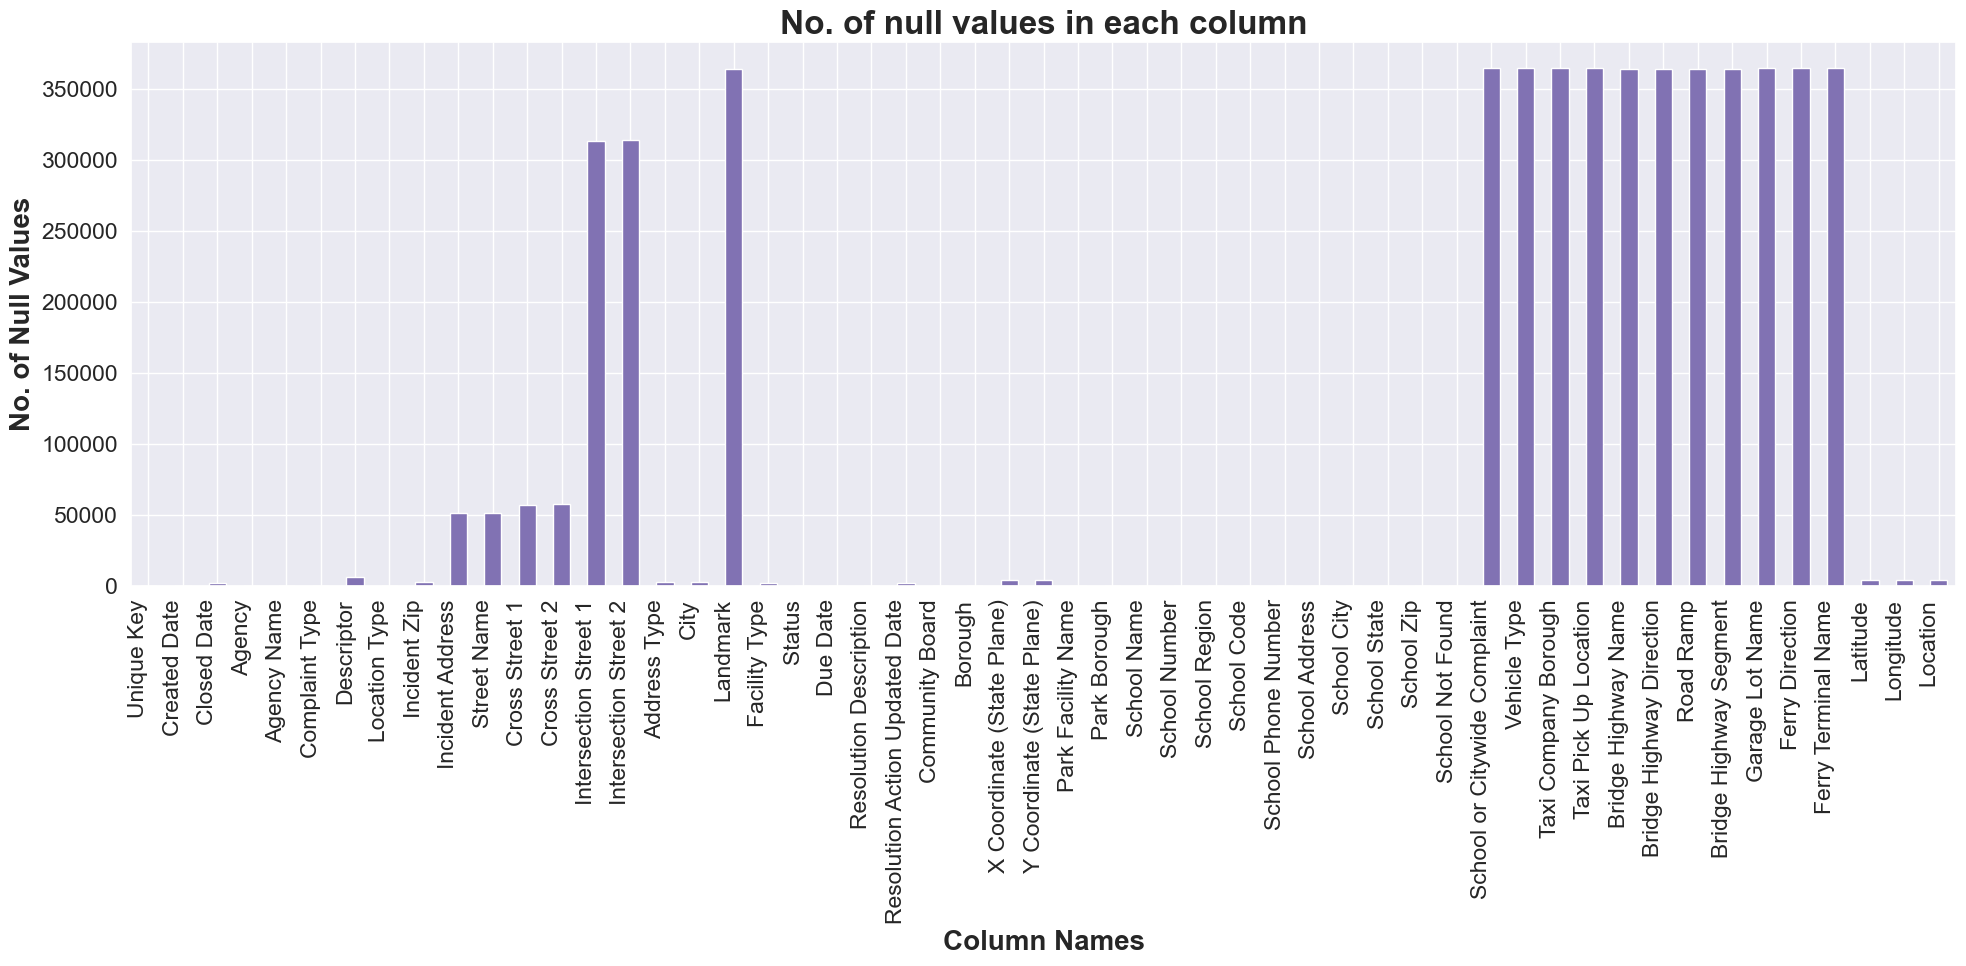

In [7]:
plt.figure(figsize=(20,10))
#sns.set_palette('viridis')
null_values.plot(kind='bar', color = 'm')
plt.title("No. of null values in each column", fontweight='bold', fontsize = 24)
plt.xlabel("Column Names", fontweight='bold', fontsize = 20)
plt.ylabel('No. of Null Values', fontweight='bold', fontsize = 20)
plt.xticks(rotation = 90, ha='right')
plt.tight_layout()
plt.show()

#### 2.2 Missing value treatment

##### 2.2.1 Remove the records whose Closed Date values are null

In [8]:
data.dropna(subset = 'Closed Date', inplace = True)
data.shape

(362177, 53)

In [9]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6496
Location Type                        130
Incident Zip                         675
Incident Address                   51686
Street Name                        51686
Cross Street 1                     55331
Cross Street 2                     55464
Intersection Street 1             311549
Intersection Street 2             311673
Address Type                         929
City                                 674
Landmark                          361802
Facility Type                         18
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough         

#### 2.3 Analyze the date column, and remove entries that have an incorrect timeline

In [10]:
# converting into proper timedelta format

data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

C:\Users\Shashank Kamatagi\AppData\Local\Temp\ipykernel_11208\2524438605.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created Date'] = pd.to_datetime(data['Created Date'])
C:\Users\Shashank Kamatagi\AppData\Local\Temp\ipykernel_11208\2524438605.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Closed Date'] = pd.to_datetime(data['Closed Date'])


#### 2.3.1 Calculate the time elapsed in closed and creation date

In [11]:
rct = (data['Closed Date'] - data['Created Date'])

#### 2.3.2 Convert the calculated date to seconds to get a better representation

In [12]:
# converting the time elapsed in seconds

from datetime import time, timedelta
def to_sec(rct):
    sec = [delta.total_seconds() for delta in rct]
    return sec

In [13]:
rct = to_sec(rct)

In [14]:
# insert the new column in the data set at index posiiton 3

data.insert(3, "Request_close_time", rct, True)

In [15]:
data.head()

,Unique Key,Created Date,Closed Date,Request_close_time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,3330.0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,5233.0,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,17494.0,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,27927.0,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,12464.0,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


Create a duplicate of the data set to perform further operations

In [16]:
data1 = data.copy()

In [17]:
data1.drop(['School Name', 'School Number', 'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State','School Zip', 'School Not Found', 'School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location','Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp','Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction','Ferry Terminal Name','Intersection Street 1','Intersection Street 2','Landmark'], axis = 1, inplace = True)

In [18]:
data1.shape

(362177, 30)

In [19]:
data1.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           0
Request_close_time                    0
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6496
Location Type                       130
Incident Zip                        675
Incident Address                  51686
Street Name                       51686
Cross Street 1                    55331
Cross Street 2                    55464
Address Type                        929
City                                674
Facility Type                        18
Status                                0
Due Date                              1
Resolution Description                0
Resolution Action Updated Date       39
Community Board                       0
Borough                               0
X Coordinate (State Plane)         1707
Y Coordinate (State Plane)         1707


#### 2.3.3 View the descriptive statistics for the newly created column

In [20]:
data1.Request_close_time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_close_time, dtype: float64

#### 2.3.4 Check the number of null values in the Complaint_Type and City columns

In [21]:
data1['Complaint Type'].isnull().sum()

0

In [22]:
data1.City.isnull().sum()

674

#### 2.3.5 Impute the NA value with Unknown City

In [23]:
data1['City'] = data1['City'].fillna('Unknown City')

In [24]:
data1.City.isnull().sum()

0

In [25]:
data1.City.value_counts()

City
BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT

#### 2.3.6 Draw a frequency plot for the complaints in each city

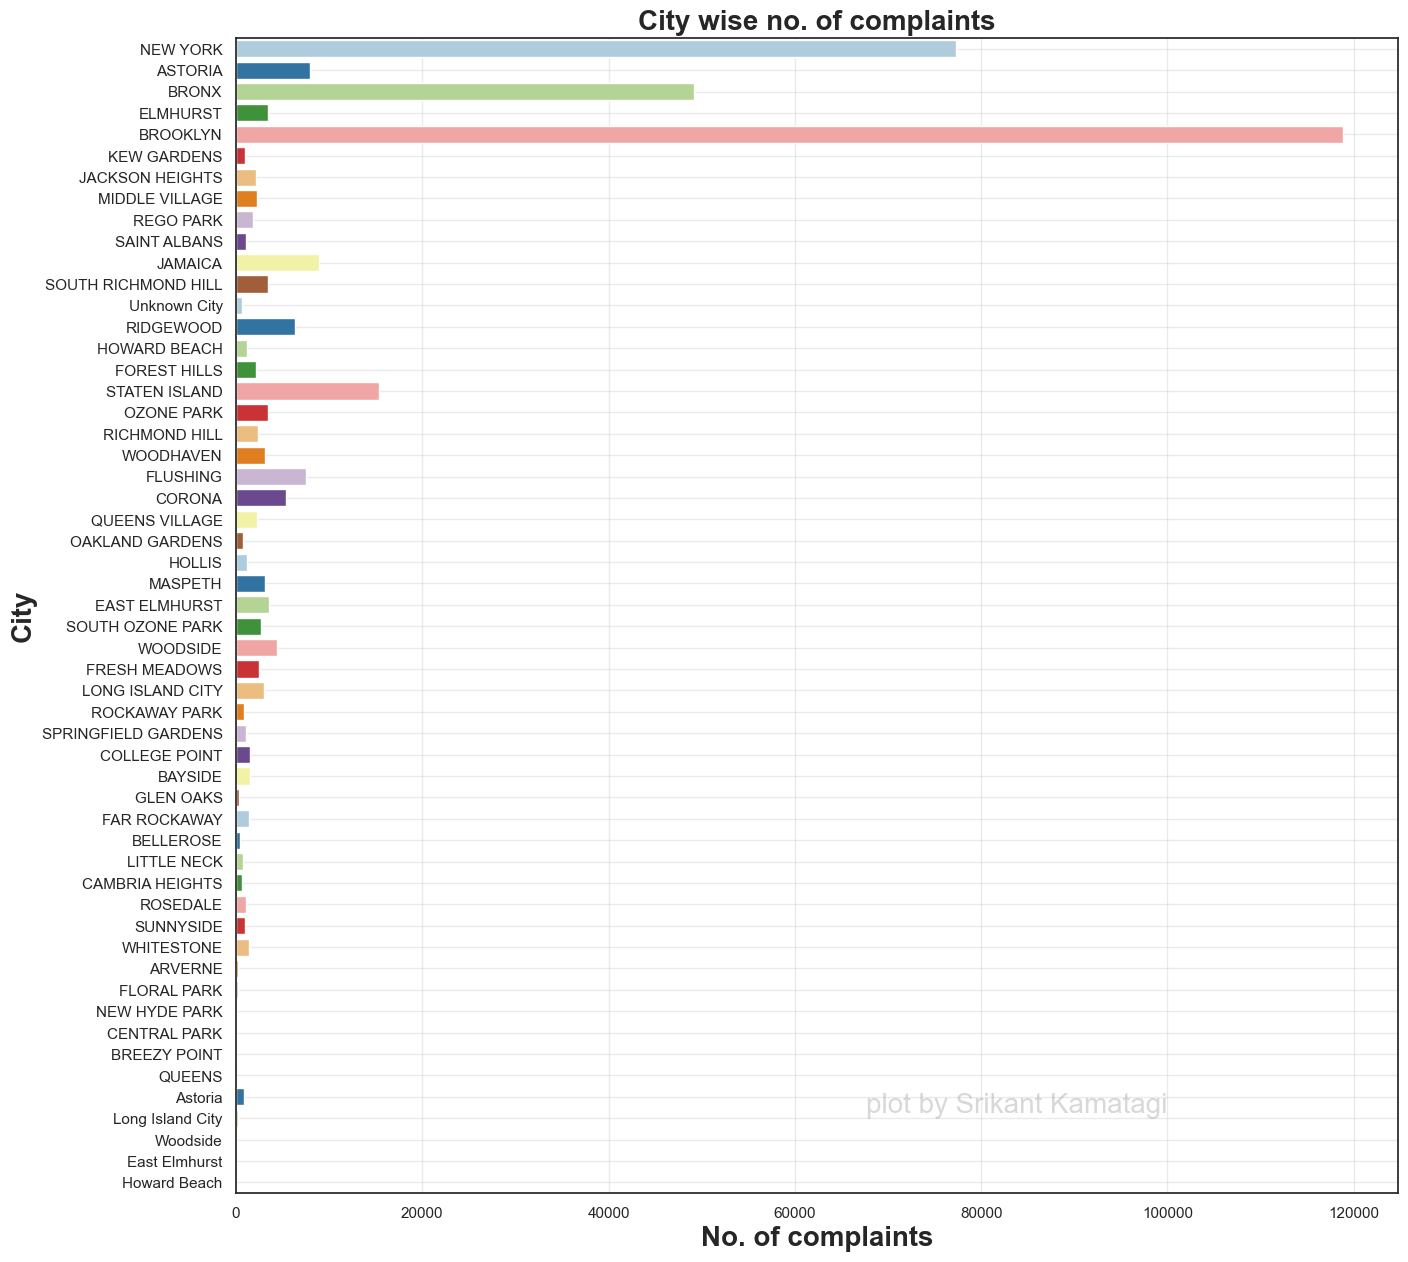

In [26]:
sns.set(style = 'white')
plt.figure(figsize = (15,15))
sns.countplot(y = 'City', data = data1, palette = 'Paired')
plt.title("City wise no. of complaints",fontweight = 'bold', fontsize = 20)
plt.xlabel('No. of complaints',fontweight = 'bold',fontsize = 20)
plt.ylabel('City',fontweight = 'bold', fontsize = 20)
plt.text(x = 100000, y = 50, s = "plot by Srikant Kamatagi", fontsize = 20, 
         color ='grey', ha ='right', va ='bottom',alpha = 0.3)
plt.grid(alpha = 0.4)
plt.savefig("City wise no.of complaints.png")
plt.show()

##### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [27]:
city_Br = data1[data1.City == 'BROOKLYN']
pd.set_option('display.max_columns', None)  
# it displays all the columns in the dataframe (None means no restriction to no of columns to display)
city_Br.head()

,Unique Key,Created Date,Closed Date,Request_close_time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,6821.0,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:56:30 AM,The Police Department responded and upon arriv...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,5022.0,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,NEW UTRECHT AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:53:58 AM,The Police Department responded and upon arriv...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,30649.0,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,DEAD END,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:47:58 AM,The Police Department responded to the complai...,01/01/2016 08:18:47 AM,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,Unspecified,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,3078.0,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,4 AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:44:52 AM,The Police Department responded to the complai...,01/01/2016 12:36:10 AM,06 BROOKLYN,BROOKLYN,988846.0,186711.0,Unspecified,BROOKLYN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,10589.0,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,AVENUE O,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:40:59 AM,The Police Department responded to the complai...,01/01/2016 02:37:28 AM,18 BROOKLYN,BROOKLYN,1003628.0,163910.0,Unspecified,BROOKLYN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"


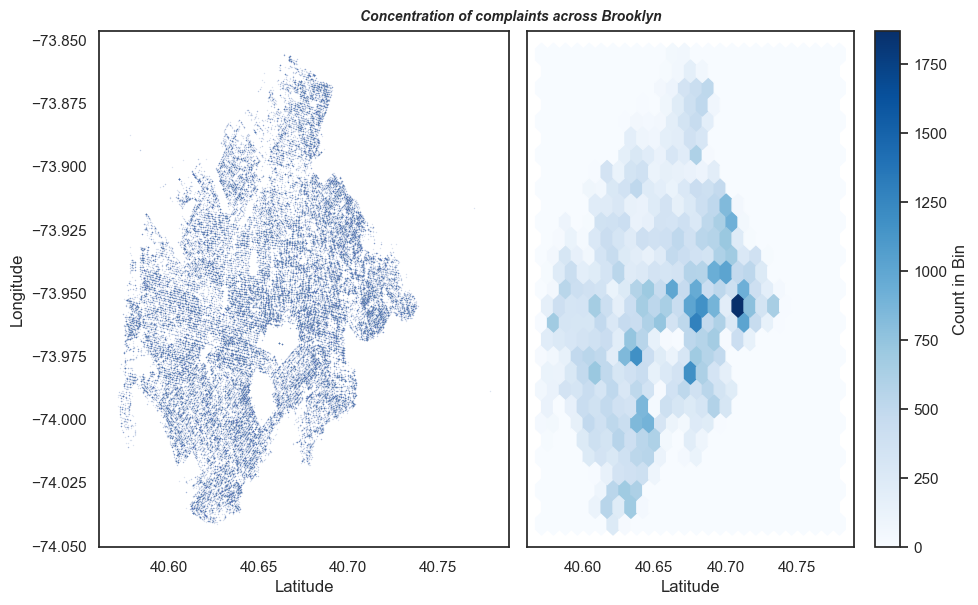

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,6), sharey = True, sharex = True)
#scatter Plot
sns.scatterplot(city_Br, x = 'Latitude', y = 'Longitude', s = 1, alpha = 0.2, ax = axs[0])

#Hexbin Plot
plt.hexbin(city_Br['Latitude'], city_Br['Longitude'],gridsize = 25, cmap = 'Blues')
plt.colorbar(label = "Count in Bin")
plt.xlabel('Latitude')
plt.tight_layout()
plt.text(40.55, -73.838, "Concentration of complaints across Brooklyn", fontweight = 'bold', fontstyle = 'italic', 
         fontsize = 10, ha = 'center', va = 'top')
plt.savefig("Concentration of Complaints across Brooklyn.png")
plt.show()

#### 3.Find major types of complaints:

In [29]:
data1['Complaint Type'].value_counts()[:5]

Complaint Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Name: count, dtype: int64

#### 3.1 Plot a bar graph to show the types of complaints

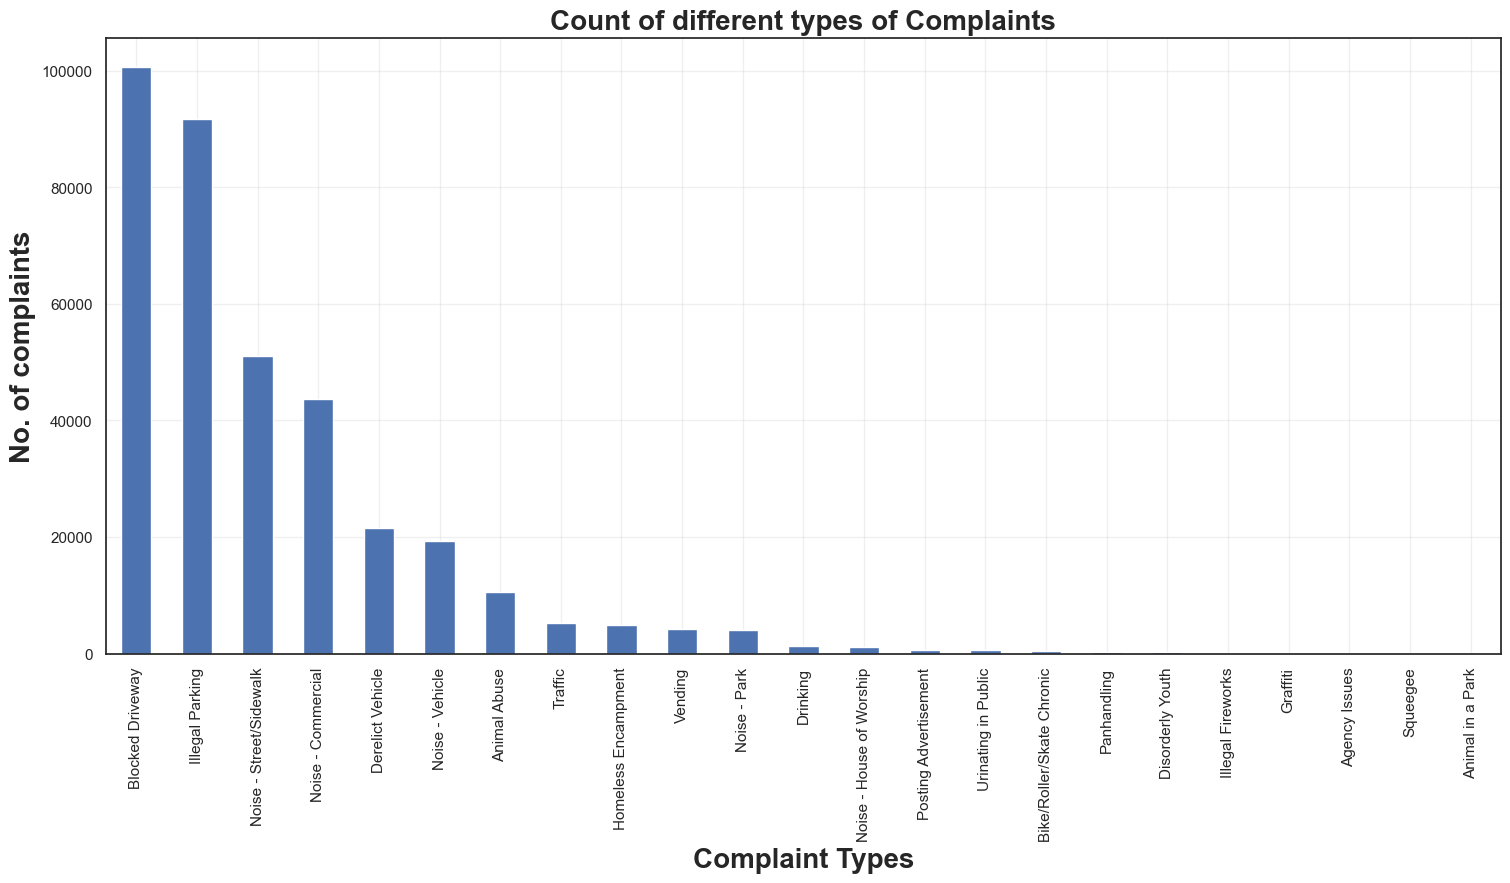

In [30]:
plt.figure(figsize = (18,8))
bar = data1['Complaint Type'].value_counts().plot(kind = 'bar')
plt.title('Count of different types of Complaints', fontweight = 'bold', fontsize = 20)
plt.xlabel('Complaint Types', fontweight = 'bold', fontsize = 20)
plt.ylabel('No. of complaints', fontweight = 'bold', fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig("Different types of complaints.png")
plt.grid(alpha = 0.3)
plt.show()

#### 3.2 Check the frequency of various types of complaints for New York City

In [31]:
city_NY = data1[data1.City == 'NEW YORK']

In [32]:
city_NY.head(2)

,Unique Key,Created Date,Closed Date,Request_close_time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,3330.0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,7102.0,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,WEST 169 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:55:32 AM,The Police Department issued a summons in resp...,01/01/2016 01:53:54 AM,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,Unspecified,MANHATTAN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"


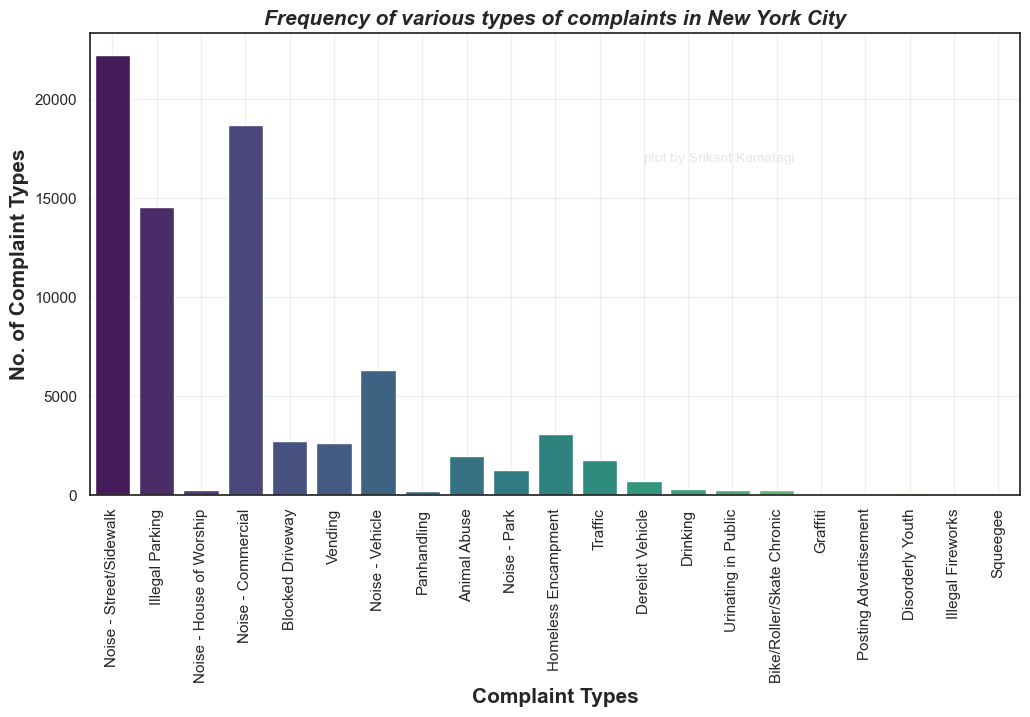

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(city_NY, x = 'Complaint Type', palette='viridis')
plt.xlabel("Complaint Types", fontweight = 'bold', fontsize = 15)
plt.ylabel("No. of Complaint Types", fontweight = 'bold',fontsize = 15)
plt.title("Frequency of various types of complaints in New York City",fontstyle = 'italic', fontweight = 'bold', fontsize = 15)
plt.text(x=12,y =17000,s = "plot by Srikant Kamatagi", fontsize = 10, color ='grey', ha ='left', va ='center', alpha = 0.2)
plt.xticks(rotation = 90)
plt.grid(alpha = 0.3)
plt.savefig("Frequency of various types of complaints in New York City.png")
plt.show()

#### 3.3 Find the top 10 complaint types

In [34]:
data1['Complaint Type'].value_counts().head(10)

Complaint Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: count, dtype: int64

#### 3.4 Display the various types of complaints in each city

In [35]:
data1.groupby('City')['Complaint Type'].unique()

City
ARVERNE                [Illegal Parking, Noise - Commercial, Animal A...
ASTORIA                [Blocked Driveway, Noise - Commercial, Noise -...
Astoria                [Illegal Parking, Noise - Street/Sidewalk, Der...
BAYSIDE                [Blocked Driveway, Derelict Vehicle, Illegal P...
BELLEROSE              [Derelict Vehicle, Blocked Driveway, Noise - S...
BREEZY POINT           [Noise - Street/Sidewalk, Blocked Driveway, An...
BRONX                  [Blocked Driveway, Illegal Parking, Noise - St...
BROOKLYN               [Illegal Parking, Blocked Driveway, Noise - Co...
CAMBRIA HEIGHTS        [Derelict Vehicle, Blocked Driveway, Noise - C...
CENTRAL PARK                  [Noise - Street/Sidewalk, Illegal Parking]
COLLEGE POINT          [Illegal Parking, Blocked Driveway, Derelict V...
CORONA                 [Blocked Driveway, Illegal Parking, Urinating ...
EAST ELMHURST          [Noise - House of Worship, Blocked Driveway, I...
ELMHURST               [Illegal Parking, Block

#### 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [36]:
df_new = data1.groupby('Complaint Type')['City'].value_counts().unstack(fill_value = 0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,35,104,85,59,0,111,7,191,78,66,5,39,51,0,50,317,26,21,40,0,56,36,1,1941,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,0,0,1,2,0,0,0,3,6,0,0,0,1,0,2,3,0,0,3,0,1,1,0,254,2,1,0,0,0,0,3,0,2,0,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,597,3597,1925,1992,0,383,33,3640,873,682,48,442,215,1,703,3620,429,174,1052,55,1000,663,76,2705,177,1681,3,772,780,1099,2161,80,270,318,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,223,72,136,94,2,215,74,532,71,347,57,162,172,0,41,1132,16,73,220,4,510,366,14,695,117,479,2,478,94,200,507,19,247,248,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,9,0,2,2,0,2,0,0,81,1,4,0,0,0,0,3,4,0,1,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,1,34,9,13,0,4,1,47,1,2,0,3,4,0,10,40,1,1,8,0,9,2,0,321,2,20,0,5,4,10,10,23,2,3,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,2,4,3,1,0,0,0,6,3,0,0,0,0,0,1,3,0,0,3,0,1,0,0,25,0,0,0,1,1,1,3,0,2,0,2,0,0,6,1,0,1,0,4,0


### 4. Visualize the major types of complaints in each city

#### 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

#### 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [37]:
# Method 1
gd = data1.groupby(['City', 'Complaint Type'])
avg_t = gd['Request_close_time'].mean().reset_index()
sd = avg_t.sort_values(by = ['City', 'Request_close_time'])
sd.head

<bound method NDFrame.head of          City           Complaint Type  Request_close_time
4     ARVERNE                 Drinking          859.000000
16    ARVERNE                  Vending         1735.000000
15    ARVERNE      Urinating in Public         2491.000000
13    ARVERNE              Panhandling         3673.000000
14    ARVERNE                  Traffic         4014.000000
..        ...                      ...                 ...
790  Woodside       Noise - Commercial         8619.000000
791  Woodside  Noise - Street/Sidewalk        12285.600000
787  Woodside         Blocked Driveway        15566.185185
789  Woodside          Illegal Parking        17293.459677
788  Woodside         Derelict Vehicle        19994.500000

[792 rows x 3 columns]>

In [38]:
# Method 2 ----> I feel this is the best way
pd.set_option('display.max_rows', None)  # displays all the rows 
group_avg = data1.groupby(['City', 'Complaint Type']).agg({'Request_close_time':'mean'})
sort_group_avg = group_avg.sort_values(by = ['City', 'Request_close_time'])
sort_group_avg

Request_close_time
City                Complaint Type                               
ARVERNE             Drinking                         8.590000e+02
                    Vending                          1.735000e+03
                    Urinating in Public              2.491000e+03
                    Panhandling                      3.673000e+03
                    Traffic                          4.014000e+03
                    Noise - Park                     4.638000e+03
                    Graffiti                         5.508000e+03
                    Noise - Vehicle                  5.673600e+03
                    Homeless Encampment              6.541250e+03
                    Noise - House of Worship         6.653429e+03
                    Noise - Street/Sidewalk          7.173207e+03
                    Noise - Commercial               8.234000e+03
                    Blocked Driveway                 8.318840e+03
                    Animal Abuse                     8.399196e+03
                    Illegal Parking                  8.406081e+03
                    Derelict Vehicle                 1.139400e+04
                    Disorderly Youth                 1.292850e+04
ASTORIA             Bike/Roller/Skate Chronic        6.718750e+03
                    Noise - House of Worship         6.931048e+03
                    Disorderly Youth                 9.713800e+03
                    Illegal Fireworks                9.979250e+03
                    Noise - Commercial               1.099457e+04
                    Noise - Park                     1.106397e+04
                    Noise - Street/Sidewalk          1.222820e+04
                    Noise - Vehicle                  1.273493e+04
                    Drinking                         1.551828e+04
                    Urinating in Public              1.588660e+04
                    Panhandling                      1.628250e+04
                    Blocked Driveway                 1.651593e+04
                    Illegal Parking                  1.691015e+04
                    Animal Abuse                     1.720688e+04
                    Traffic                          1.742368e+04
                    Homeless Encampment              1.770431e+04
                    Vending                          1.827344e+04
                    Posting Advertisement            2.295167e+04
                    Derelict Vehicle                 3.244660e+04
                    Graffiti                         5.074225e+04
Astoria             Noise - Commercial               1.240515e+04
                    Noise - Street/Sidewalk          1.290707e+04
                    Illegal Parking                  1.615603e+04
                    Blocked Driveway                 1.649286e+04
                    Derelict Vehicle                 2.503243e+04
BAYSIDE             Noise - Street/Sidewalk          5.334941e+03
                    Traffic                          5.500889e+03
                    Noise - Vehicle                  5.621833e+03
                    Vending                          6.760500e+03
                    Drinking                         6.848000e+03
                    Noise - Commercial               8.289043e+03
                    Illegal Parking                  9.070041e+03
                    Disorderly Youth                 9.338500e+03
                    Blocked Driveway                 9.345946e+03
                    Homeless Encampment              1.034250e+04
                    Animal Abuse                     1.120355e+04
                    Noise - Park                     1.178375e+04
                    Derelict Vehicle                 1.226163e+04
                    Noise - House of Worship         1.613667e+04
                    Graffiti                         1.638133e+04
BELLEROSE           Noise - Park                     5.091000e+03
                    Disorderly Youth                 6.631500e+03
                    N

#### 5. See whether the average response time across different complaint types is similar (overall)

In [39]:
data1.head(1)

,Unique Key,Created Date,Closed Date,Request_close_time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,3330.0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"


In [40]:
# Method 1
group_avg1 = data1.groupby('Complaint Type').agg({'Request_close_time':'mean'}).reset_index()
sorted_avg2 = group_avg1.sort_values(by = ['Request_close_time'], ascending=False)
sorted_avg2

,Complaint Type,Request_close_time
2,Animal in a Park,1.212634e+06
5,Derelict Vehicle,2.535960e+04
8,Graffiti,2.327634e+04
0,Agency Issues,1.828912e+04
1,Animal Abuse,1.803256e+04
4,Blocked Driveway,1.623252e+04
17,Panhandling,1.585355e+04
11,Illegal Parking,1.565044e+04
9,Homeless Encampment,1.545138e+04
19,Squeegee,1.456025e+04


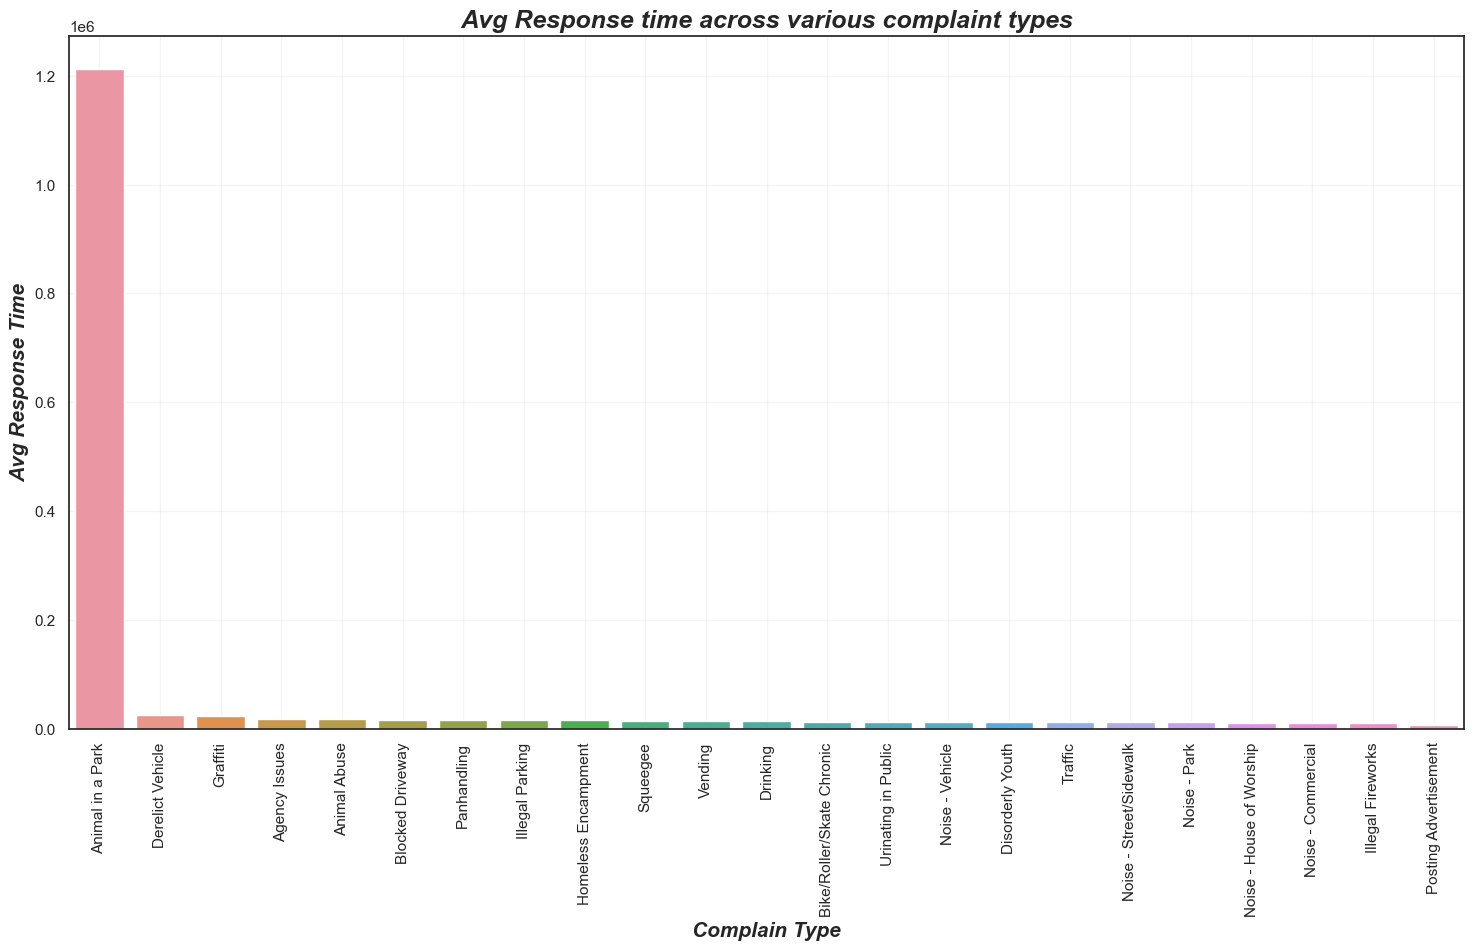

In [41]:
#visualising the avg response time sorted by complaint type

plt.figure(figsize = (18,9))
sns.barplot(sorted_avg2, x = 'Complaint Type', y = 'Request_close_time', errorbar = None)
plt.title("Avg Response time across various complaint types", fontstyle = 'italic', fontweight = 'bold', fontsize = 18)
plt.xlabel('Complain Type', fontstyle = 'italic', fontweight = 'bold', fontsize = 15)
plt.ylabel('Avg Response Time', fontstyle = 'italic', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)
plt.savefig("Avg Response time across various complaint types.png")
plt.show()

In [42]:
# method 2
avg_ct = data1.groupby('Complaint Type')['Request_close_time'].mean()
avg_ct.sort_values(ascending=False)
#below observation shows that most the complaint types have similar avg response time

Complaint Type
Animal in a Park             1.212634e+06
Derelict Vehicle             2.535960e+04
Graffiti                     2.327634e+04
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Blocked Driveway             1.623252e+04
Panhandling                  1.585355e+04
Illegal Parking              1.565044e+04
Homeless Encampment          1.545138e+04
Squeegee                     1.456025e+04
Vending                      1.436628e+04
Drinking                     1.382130e+04
Bike/Roller/Skate Chronic    1.312369e+04
Urinating in Public          1.295929e+04
Noise - Vehicle              1.256180e+04
Disorderly Youth             1.236375e+04
Traffic                      1.230912e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Park                 1.222606e+04
Noise - House of Worship     1.139109e+04
Noise - Commercial           1.108576e+04
Illegal Fireworks            1.011348e+04
Posting Advertisement        7.286256e+03
Name: Request_close

#### 5.1 Visualize the average of Request_Closing_Time

In [43]:
a1 = data1.groupby('City').agg({'Request_close_time':'mean'}).reset_index()
s1 = a1.sort_values(by = ['Request_close_time'], ascending = False)
s1

,City,Request_close_time
36,QUEENS,43030.270270
16,FLORAL PARK,36588.729592
37,QUEENS VILLAGE,35635.228343
4,BELLEROSE,34570.416838
42,ROSEDALE,34151.684693
49,Unknown City,33399.753709
8,CAMBRIA HEIGHTS,32572.987034
46,SPRINGFIELD GARDENS,30606.794333
20,GLEN OAKS,30099.207756
32,NEW HYDE PARK,25403.790698


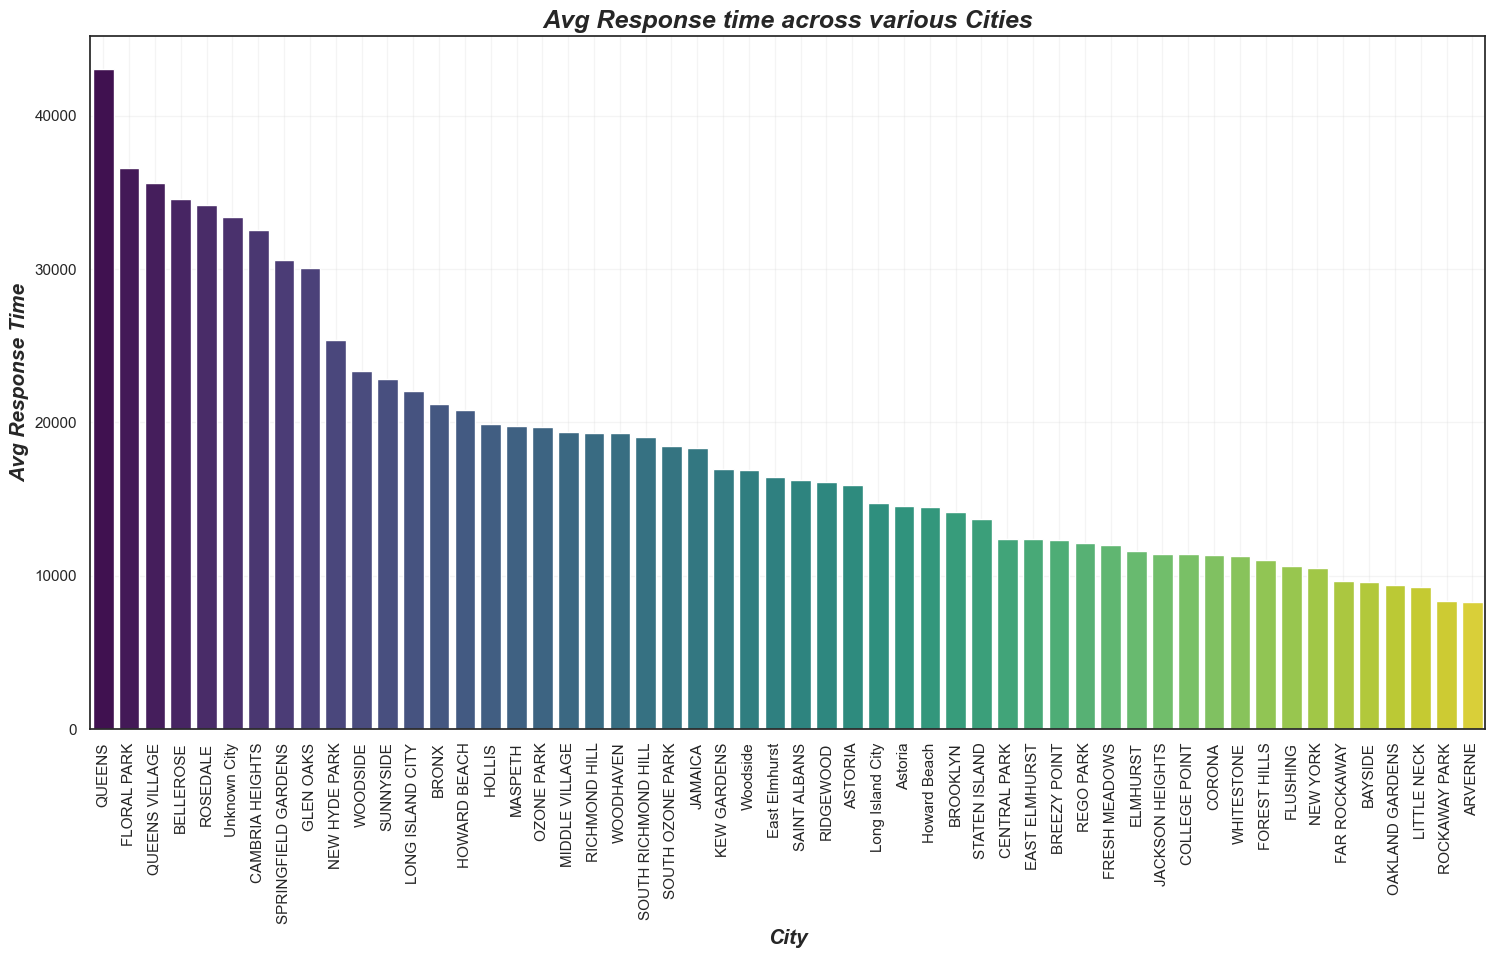

In [44]:
# City Wise
plt.figure(figsize = (18,9))
sns.barplot(s1, x = 'City', y = 'Request_close_time',palette = 'viridis', errorbar = None)
plt.title("Avg Response time across various Cities", fontstyle = 'italic', fontweight = 'bold', fontsize = 18)
plt.xlabel('City', fontstyle = 'italic', fontweight = 'bold', fontsize = 15)
plt.ylabel('Avg Response Time', fontstyle = 'italic', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)
plt.savefig('Avg Response time across various Cities.png')
plt.show()

### 6. Identify the significant variables by performing statistical analysis using p-values

In [45]:
data.head(1)

,Unique Key,Created Date,Closed Date,Request_close_time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,3330.0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"


### Perform Chi-Square analysis to determine significant variable

In [46]:
from scipy import stats

help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

####  Complaint type and Request Close time contingency table

In [47]:
data_ct = pd.crosstab(data['Request_close_time'].mean(), data['Complaint Type'])
data_ct

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
row_0,,,,,,,,,,,,,,,,,,,,,,,
15113.299633,8,10530,1,475,100624,21518,315,1404,157,4879,172,91716,43751,1068,4089,51139,19301,325,679,4,5196,641,4185


In [49]:
# Use Chi Square to find the relationship between both the variables

chi, pval, dof, exp = stats.chi2_contingency(data_ct.values)
print("Chi-Square:", chi)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequency:", exp)

Chi-Square: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected Frequency: [[8.00000e+00 1.05300e+04 1.00000e+00 4.75000e+02 1.00624e+05 2.15180e+04
  3.15000e+02 1.40400e+03 1.57000e+02 4.87900e+03 1.72000e+02 9.17160e+04
  4.37510e+04 1.06800e+03 4.08900e+03 5.11390e+04 1.93010e+04 3.25000e+02
  6.79000e+02 4.00000e+00 5.19600e+03 6.41000e+02 4.18500e+03]]


In [50]:
# provide a statistical test to accept or reject the Null Hypothesis

if pval < 0.05:
    print("Reject Null - Hypothesis -- Relation exists")
else:
    print("Failed to reject Null - Hypothesis -- Relation doesn't exists")

Failed to reject Null - Hypothesis -- Relation doesn't exists


#### City and Complaint type contingency table

In [51]:
data_city = pd.crosstab(data['Complaint Type'], data['City'])
data_city

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,35,104,85,59,0,111,7,191,78,66,5,39,51,0,50,317,26,21,40,0,56,36,1,1941,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,0,0,1,2,0,0,0,3,6,0,0,0,1,0,2,3,0,0,3,0,1,1,0,254,2,1,0,0,0,0,3,0,2,0,1,1,0,10,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,597,3597,1925,1992,0,383,33,3640,873,682,48,442,215,1,703,3620,429,174,1052,55,1000,663,76,2705,177,1681,3,772,780,1099,2161,80,270,318,1202,1946,330,2845,278,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,223,72,136,94,2,215,74,532,71,347,57,162,172,0,41,1132,16,73,220,4,510,366,14,695,117,479,2,478,94,200,507,19,247,248,425,356,267,2184,17,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,9,0,2,2,0,2,0,0,81,1,4,0,0,0,0,3,4,0,1,2,2,0,25,2,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,1,34,9,13,0,4,1,47,1,2,0,3,4,0,10,40,1,1,8,0,9,2,0,321,2,20,0,5,4,10,10,23,2,3,14,25,6,188,12,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,2,4,3,1,0,0,0,6,3,0,0,0,0,0,1,3,0,0,3,0,1,0,0,25,0,0,0,1,1,1,3,0,2,0,2,0,0,6,1,1,0,4,0
Homeless Encampment,4,32,0,2,1,0,275,948,6,0,3,26,2,34,0,16,0,26,18,6,0,9,3,0,11,93,5,0,10,0,11,5,0,3060,1,8,2,19,6,30,26,4,4,11,5,12,7,77,12,0,10,38,0


In [52]:
chi, pval, dof, exp = stats.chi2_contingency(data_city.values)
print("Chi-Square:", chi)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequency:", exp)

Chi-Square: 141343.23155024176
p-value: 0.0
Degrees of Freedom: 1092
Expected Frequency: [[7.54353629e+00 2.32742851e+02 2.63586886e+01 ... 9.03476818e+01
  1.26900338e+02 4.83485338e+00]
 [7.16453252e-04 2.21049341e-02 2.50343704e-03 ... 8.58084165e-03
  1.20524588e-02 4.59193976e-04]
 [3.38882388e-01 1.04556338e+01 1.18412572e+00 ... 4.05873810e+00
  5.70081299e+00 2.17198751e-01]
 ...
 [3.72125819e+00 1.14813028e+02 1.30028520e+01 ... 4.45688915e+01
  6.26004708e+01 2.38505351e+00]
 [4.59246535e-01 1.41692628e+01 1.60470314e+00 ... 5.50031950e+00
  7.72562607e+00 2.94343339e-01]
 [2.99764041e+00 9.24870444e+01 1.04743806e+01 ... 3.59022415e+01
  5.04274875e+01 1.92126760e+00]]


In [53]:
# provide a statistical test to accept or reject the Null Hypothesis

if pval < 0.05:
    print("Reject Null - Hypothesis -- Relation exists")
else:
    print("Failed to reject Null - Hypothesis -- Relation doesn't exists")

Reject Null - Hypothesis -- Relation exists


#### Location Type and Complaint type contingency table

In [54]:
data_l = pd.crosstab(data['Complaint Type'], data['Location Type'])
data_l

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Animal Abuse,0,0,108,0,245,0,0,143,160,533,6722,0,716,1874,26,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,31,0,60,384,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,100587,0,0
Derelict Vehicle,0,0,0,18,0,0,0,0,0,0,0,8,0,21389,0,95
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,93,0,10,212,0,0
Drinking,0,457,0,0,0,0,0,99,0,0,296,0,96,455,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,73,0,51,33,0,0
Homeless Encampment,2,0,0,19,0,0,0,357,0,0,1149,4,585,2754,0,0


In [55]:
chi, pval, dof, exp = stats.chi2_contingency(data_city.values)
print("Chi-Square:", chi)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequency:", exp)

Chi-Square: 141343.23155024176
p-value: 0.0
Degrees of Freedom: 1092
Expected Frequency: [[7.54353629e+00 2.32742851e+02 2.63586886e+01 ... 9.03476818e+01
  1.26900338e+02 4.83485338e+00]
 [7.16453252e-04 2.21049341e-02 2.50343704e-03 ... 8.58084165e-03
  1.20524588e-02 4.59193976e-04]
 [3.38882388e-01 1.04556338e+01 1.18412572e+00 ... 4.05873810e+00
  5.70081299e+00 2.17198751e-01]
 ...
 [3.72125819e+00 1.14813028e+02 1.30028520e+01 ... 4.45688915e+01
  6.26004708e+01 2.38505351e+00]
 [4.59246535e-01 1.41692628e+01 1.60470314e+00 ... 5.50031950e+00
  7.72562607e+00 2.94343339e-01]
 [2.99764041e+00 9.24870444e+01 1.04743806e+01 ... 3.59022415e+01
  5.04274875e+01 1.92126760e+00]]


In [56]:
# provide a statistical test to accept or reject the Null Hypothesis

if pval < 0.05:
    print("Reject Null - Hypothesis -- Relation exists")
else:
    print("Failed to reject Null - Hypothesis -- Relation doesn't exists")

Reject Null - Hypothesis -- Relation exists
